<h1 style="font-family:Impact,Arial;font-size:30px;">37004 Interest Rates and Credit Risk Models - Spring 2022</h1>
<h1 style="font-family:Impact,Arial;font-size:45px;">Assignment Part 3</h1>
<h2 style="font-family:Arial;">Erik Schl&ouml;gl</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:Erik.Schlogl@uts.edu.au?Subject=37000 JIT" target="_blank">
<small><font color=MediumVioletRed>Erik.Schlogl@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

***Importing Libraries***

In [62]:
from scipy.optimize import fsolve
from scipy.stats import norm
import numpy as np
import scipy.optimize as opt
from scipy.optimize import minimize
import warnings
from IPython.display import display, HTML, Math, Markdown
from pylab import plt, mpl
%matplotlib inline
from dateutil.relativedelta import relativedelta
mpl.rcParams['font.family'] = 'serif'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
%matplotlib inline
import pandas as pd
import math
from math import *

In all the tasks below, suppose that current default–free interest rates are 1.5% continuously compounded, for all maturities. Suppose further that a corporate entity has issued &euro;150 million of corporate debt (only), paying no coupons and maturing in 10 years. This entity has a market capitalisation of &euro;28 million and the volatility of its share price is approximately 40%.

<H2>Task 1:</H2>
Using the Black-Scholes/Merton model of credit risk as explained in Lecture 7, determine the value of the debt. What is the credit spread (in terms of continuously compounded yields) for this entity? <I>(5 marks)</I>

***Deterine the Value of Debt:***
$$ \text{Using the following equations:} $$
$$d_{1,2} = \frac{ln(\frac{V}{K})+(r \pm \frac{\sigma_V^2}{2})\cdot(T-t)}{\sigma_V\cdot\sqrt{T-t}}$$
$$ E(t) = V \phi (d_1) - Ke^{r(T-t)}\cdot \phi(d_2)$$ 

$$\sigma_E = \frac{\partial E}{\partial V} \cdot \frac{V}{E} \cdot \sigma_V $$
$$\therefore \sigma_E = \frac{1}{\phi (d_1)} \cdot \frac{V}{E} \cdot \sigma_V  $$
$$\text{It follows that:}$$

$$\sigma_V = \frac{E \cdot \sigma_E}{V \cdot \phi(d_1)}$$


$$\text{In our scenario here, we have:}$$

$$ t = 0, \quad T = 10, \quad E(0) = €28,000,000.00, \quad K = €150,000,000, \quad r = 1.5\%, \quad \sigma_{E(0)} = 40\%$$

$$\text{Below I use the following equations to solve for both }\sigma_V \text{ and } V$$

$$0 = \sigma_V \cdot V \cdot \phi(d_1) - 11.2 \quad \text{and} \quad 0 = V\cdot\phi(d_1) - 150\cdot e^{-0.015\cdot10} \cdot \phi(d_2) - 28$$

***Formula for $\phi(d_1)$ and $\phi(d_2)$***

In [63]:
def nd1(V:float,sgm_V:float):
    first = np.log(V/150)
    second = (0.015+((sgm_V**2)/2))*10
    third = sgm_V*(np.sqrt(10))
    fourth = (first + second)/third
    return norm.cdf(fourth)

def nd2(V:float,sgm_V:float):
    first = np.log(V/150)
    second = (0.015-((sgm_V**2)/2))*10
    third = sgm_V*(np.sqrt(10))
    fourth = (first + second)/third
    return norm.cdf(fourth)

***Creating a formula where we can use $\texttt{fsolve}$ to solve the system***

In [64]:
def eqs(variables:list):
    V, sgm_V = variables
    eq1 = (sgm_V * V * nd1(V,sgm_V)) - 11.2  
    eq2 = (V * nd1(V,sgm_V)) - (150*np.exp(-0.015*10)*nd2(V,sgm_V)) - 28
    return [eq1,eq2]

***Solving the System for $V$ and $\sigma_V$***
###### Note: Below I also supress and then unsurpress the RuntimeWarnings and DepreciationWarnings

In [74]:
# Ignore wanrnings
warnings.filterwarnings("ignore")

# Find solution for V and sigma V
V, sgm_V =  fsolve(eqs, (100, 100))

# Print results
display(list([V, sgm_V]))
display(Markdown(r'$V$' + str(':  €') + str(round(V*1000000,2))))
display(Markdown(r'$\sigma_V$' + str(':  ') + str(round(sgm_V,4)) ))

# Unignore warnings
warnings.filterwarnings("default")

[144.6555292287109, 0.1120838131528769]

$V$:  €144655529.23

$\sigma_V$:  0.1121

We know $E(0)$ and now $V$, we can then find $\overline{B}(0)$ using the following:
$$ \overline{B}(0) = V - E(0)$$

In [75]:
# Value of debt
ValueofDebt = (V*1000000)-28000000

# Print result
display(Markdown(r'$\overline{B}(0)$' + str(':  €') + str(round(ValueofDebt,2))))

$\overline{B}(0)$:  €116655529.23

***Now, finding a formula for the credit spread:***

We have the default free continiously compounded yields, we can find the ZCB price at that time using:
$$ y(t,T) = -\frac{ln(B(t,T))}{T-t} \quad \text{and} \quad \overline{y}(t,T) = -\frac{ln(\overline{B}(t,T))}{T-t} \rightarrow s_y(t, T ) = \overline{y} (t, T ) − y (t, T)  $$
$$ y(0,10) = -\frac{ln(B(0,10))}{10} \quad \text{and} \quad \overline{y}(0,10) = -\frac{ln(\overline{B}(0,10))}{10}\rightarrow s_y(0, 10 ) = \overline{y} (0, 10 ) − y (0, 10)  $$

$$ B(t,T) = exp(-y(t,T)\cdot T) \rightarrow B(0,10) = exp(-y(0,10)\cdot10) $$

$$\therefore y(0,10) = 1.5\%$$

In [76]:
# Final answer
ans2 = -np.log(((ValueofDebt/1000000)/150))/10

# Print result
display(Markdown(r'Credit Spread $c$  :  ' + str(round(ans2 - 0.015,7))))

Credit Spread $c$  :  0.010141

<H2>Task 2:</H2>
Assume now that the default-free bond price dynamics and firm's value process are given by
\begin{eqnarray*}
\frac{dB(t,T)}{B(t,T)}&=&rdt+\sigma_r\cdot(T-t)dW_1(t)\\
\frac{dV(t)}{V(t)}&=&rdt+\sigma_V\left(\rho
dW_1(t)+\sqrt{1-\rho^2}dW_2(t)\right)
\end{eqnarray*}
with $W_1$ and $W_2$ independent Brownian motions under the spot risk-neutral measure. Assume further that the firm defaults at time $\tau$ if 
$$
V(\tau)<B(\tau,T)K
$$
where $T$ is the maturity of the debt and $K$ is the face value of the debt. In the event of default at time $\tau$, the debt holders receive a total of $KcB(\tau,T)$ at time $\tau$.

In addition to the information given above, assume $\rho=-0.4$ and $\sigma_r=0.015$. Determine the value of the debt as a function of $c$. Plot the credit spread (in terms of continuously compounded yields) for this entity as a function of $c$ for $0<c<1$. <I>(5 marks)</I>

***Finding a formula for $V$ and $\sigma_V$***

For $V(0)$ we have the following:

$$V(0) = \frac{E - K\cdot B(0,T)P_T\{\text{no default}\}}{P_V\{\text{no default}\}}$$ 
$$ \text{ i.e. } 0 =  E - K\cdot B(0,T)P_T\{\text{no default}\} - V(0)P_V\{\text{no default}\}$$ 

$$P_T\{\text{no default\}} = \mathcal{N}\left( \frac{k + \frac{1}{2}Q(T)}{\sqrt{Q(T)}}\right ) - e^{-2k}\cdot \mathcal{N}\left( \frac{-k + \frac{1}{2}Q(T)}{\sqrt{Q(T)}}\right )$$

$$P_V\{\text{no default\}} = \mathcal{N}\left( \frac{k - \frac{1}{2}Q(T)}{\sqrt{Q(T)}}\right ) - e^{-2k}\cdot \mathcal{N}\left( \frac{-k - \frac{1}{2}Q(T)}{\sqrt{Q(T)}}\right )$$

$$\text{with} \quad Q(T) = \sigma_V^{2}T - \rho \sigma_V \sigma_r T^{2} + \frac{1}{3}\sigma^{2}_r T^3 \quad \text{and } \quad k = \text{ln}\frac{V(0)}{B(0,T)\cdot K} $$

***For the partial derivative $\frac{\partial E}{\partial V}$***  
###### Note: This was completed using mathematica, I have uploaded a .pdf of that notebook with this assignment.


$$ \frac{\partial E}{\partial V(0)} = -\frac{e^{-3 r T}}{\sqrt{Q(T)} V(0)^3} \left(-2 K^3 \sqrt{Q(T)} \cdot \mathcal{N}\left[\frac{0.5Q(T)-\log \left(\frac{V(0) e^{r T}}{K}\right)}{\sqrt{Q(T)}}\right]+K^2 \sqrt{Q(T)} V(0) e^{r T}\cdot \mathcal{N}\left[\frac{-\log \left(\frac{V(0) e^{r T}}{K}\right)-0.5Q(T)}{\sqrt{Q(T)}}\right] +\sqrt{Q(T)} V(0)^3 e^{3 r T} \cdot \mathcal{N}\left[\frac{\log \left(\frac{V(0) e^{r T}}{K}\right)-0.5Q(T)}{\sqrt{Q(T)}}\right]-K^3 \cdot \mathcal{N}'\left(\frac{0.5Q(T)-\log \left(\frac{V(0) e^{r T}}{K}\right)}{\sqrt{Q(T)}}\right)+K^2 V(0) e^{r T} \cdot \mathcal{N}'\left(\frac{-\log \left(\frac{V(0) e^{r T}}{K}\right)-0.5Q(T)}{\sqrt{Q(T)}}\right)+V(0)^3 e^{3 r T} \cdot \mathcal{N}'\left(\frac{\log \left(\frac{V(0) e^{r T}}{K}\right)-0.5Q(T)}{\sqrt{Q(T)}}\right)-K V(0)^2 e^{2 r T} \cdot\mathcal{N}'\left(\frac{\log \left(\frac{V(0) e^{r T}}{K}\right)+0.5Q(T)}{\sqrt{Q(T)}}\right)\right) $$

Given the following: 

$$\sigma_E = \frac{\partial E}{\partial V} \cdot \frac{V}{E} \cdot \sigma_V $$

$$\text{i.e. }\quad 0 = \frac{\partial E}{\partial V} \cdot \frac{V}{E} \cdot \sigma_V - \sigma_E $$

We can use $\texttt{fsolve}$ to solve the above equations:

$$\text{In our scenario here, we have:}$$

$$ t = 0, \quad T = 10, \quad E(0) = €28,000,000.00, \quad K = €150,000,000, \quad r = 1.5\%, \quad \sigma_{E(0)} = 40\%, \quad \rho=-0.4 $$ 
$$ \text{and} \quad \sigma_r=0.015$$
***Functions for both the PDE and the Equity Function:***

In [77]:
# B(0,T)
disc = np.exp(-0.015*10)

# Define function for 
def k(V:float):
    return np.log((np.exp(-0.015*10)*V)/(150))

# Define function for Q(T) and sqrt(Q(T))
def qt(V:float,sgm_V:float):
    ans = (((sgm_V**2)*10) - (0.4*(sgm_V)*0.015*100) + ((1/3)*(0.015**2)*(10**3)))
    return ans, np.sqrt(ans)

# Define function for Pt{no default}
def pt(V:float,sgm_V:float):
    return norm.cdf((disc + 0.5*qt(V,sgm_V)[0])/(np.sqrt(qt(V,sgm_V)[0]))) - np.exp(-2*disc)*norm.cdf((-disc + 0.5*qt(V,sgm_V)[0])/(np.sqrt(qt(V,sgm_V)[0])))

# Define function for Pv{no default}
def pv(V:float,sgm_V:float):
    return norm.cdf((disc - 0.5*qt(V,sgm_V)[0])/(np.sqrt(qt(V,sgm_V)[0]))) - np.exp(-2*disc)*norm.cdf((-disc - 0.5*qt(V,sgm_V)[0])/(np.sqrt(qt(V,sgm_V)[0])))

# Define function for the partial derivative
def partial(V:float,sgm_V:float):
    outside_brackets = ((1/(qt(V,sgm_V)[1]*(V**3)))) * np.exp(-3*0.015*10)
    first = (np.exp(0.015*10)*(150**2)*qt(V,sgm_V)[1]*V) * norm.cdf((-0.5*qt(V,sgm_V)[0] - k(V))/(qt(V,sgm_V)[1]))
    second = 2*(150**3)*qt(V,sgm_V)[1] * norm.cdf((0.5*qt(V,sgm_V)[0] - k(V))/(qt(V,sgm_V)[1]))
    third = np.exp(3*0.015*10)*qt(V,sgm_V)[1]*(V**3) * norm.cdf((-0.5*qt(V,sgm_V)[0] + k(V))/(qt(V,sgm_V)[1]))
    fourth = np.exp(0.015*10) * (150**2) * V * norm.pdf((-0.5*qt(V,sgm_V)[0] - k(V))/(qt(V,sgm_V)[1]))
    fifth = (150**3) * norm.pdf((0.5*qt(V,sgm_V)[0] - k(V))/(qt(V,sgm_V)[1]))
    sixth = np.exp(3*0.015*10) * (V**3) * norm.pdf((-0.5*qt(V,sgm_V)[0] + k(V))/(qt(V,sgm_V)[1]))
    seventh = np.exp(2 * 0.015*10)*150*(V**2) * norm.pdf((0.5*qt(V,sgm_V)[0] + k(V))/(qt(V,sgm_V)[1]))
    return -outside_brackets*(first - second + third + fourth - fifth + sixth  - seventh)

def eqs2(variables:list):
    V, sgm_V = variables
    eq1 = 28 - (150*disc*(pt(V,sgm_V))) - (V*pv(V,sgm_V))
    eq2 = (partial(V,sgm_V)*(V/28)*sgm_V) - 0.4
    return [eq1,eq2]

***Using $\texttt{fslove}$:***

In [79]:
V, sgm_V =  fsolve(eqs2, (100, 0.9))

display(list([V, sgm_V]))
display(Markdown(r'$V$' + str(':  €') + str(round(V*1000000,2))))
display(Markdown(r'$\sigma_V$' + str(':  ') + str(round(sgm_V,4))))

[4154.520843436944, 45.05638604130641]

$V$:  €4154520843.44

$\sigma_V$:  45.0564

***Obviously the above is wrong - but I can't seem to figure out if I am incorrect in my computation of the partial derivative - or I am incorrect in my implementation.. Regardless, for demostration purposes I have graphed the results below:***

<>:28: DeprecationWarning: invalid escape sequence \o
<>:28: DeprecationWarning: invalid escape sequence \o
C:\Users\TomH\AppData\Local\Temp\ipykernel_57396\1927874128.py:28: DeprecationWarning: invalid escape sequence \o
  ax1.set_title('$\overline{B}(0,T)$ vs Credit Spread',size=15);


,c,cs
0,0.000,9.661890e-05
1,0.001,9.652223e-05
2,0.002,9.642557e-05
3,0.003,9.632890e-05
4,0.004,9.623224e-05
...,...,...
996,0.996,3.862897e-07
997,0.997,2.897171e-07
998,0.998,1.931447e-07
999,0.999,9.657228e-08


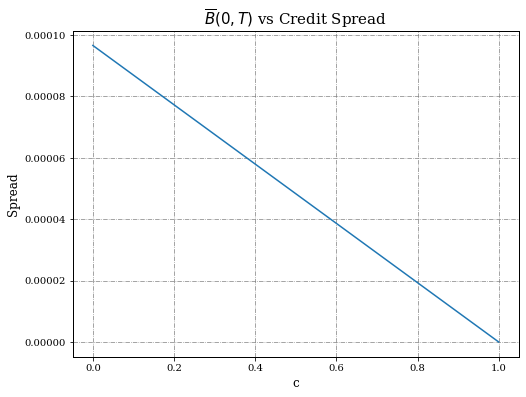

In [80]:
def k(V0:float,B0:float,K:float):
    return np.log(V0/(B0*K))

def Q(T:float,sv:float,p:float,sr:float):
    return ((sv**2)*T) - (p*sv*sr*(T**2)) + ((1/3)*(sr**2)*(T**3))

def P(V0:float,B0:float,K:float,T:float,sv:float,p:float,sr:float):
    first = norm.cdf((k(V0,B0,K)+(0.5*Q(T,sv,p,sr)))/(np.sqrt(Q(T,sv,p,sr))))
    second = -np.exp(-2*k(V0,B0,K))
    third = norm.cdf((-k(V0,B0,K)+(0.5*Q(T,sv,p,sr)))/(np.sqrt(Q(T,sv,p,sr))))
    return first + (second * third)

def DefaultableBond(V0:float,B0:float,K:float,T:float,sv:float,p:float,sr:float,c:float):
    return ((1-((1-c)*(1-P(V0,B0,K,T,sv,p,sr)))))

cs = np.arange(0,1+0.001,0.001)
cs_li = []
for i in range(0,len(cs)):
    cs_li.append((-np.log(DefaultableBond(V,np.exp(-0.015*10),150,10,sgm_V,-0.4,0.015,cs[i]))/10))

df = pd.DataFrame(cs, columns = ['c'])
df['cs'] = cs_li

fig, (ax1) = plt.subplots(1,figsize=(8,6));
ax1.plot(df['c'],df['cs']);
ax1.set(xlabel ='c');
ax1.set(ylabel = 'Spread');
ax1.set_title('$\overline{B}(0,T)$ vs Credit Spread',size=15);
ax1.xaxis.get_label().set_fontsize(12);
ax1.yaxis.get_label().set_fontsize(12);
ax1.set(facecolor = 'white');
ax1.grid(color='Gray', linestyle='-.', linewidth=0.7);
ax1.patch.set_edgecolor('black'); 
ax1.patch.set_linewidth('1'); 

display(df)

***I understand the above is incorrect, and so I have also done it with the values of $\sigma_V$ and $V(0)$ from task 1 also, again for demostration pruposes (I think the below is correct, but obviously the above is not)***

<>:37: DeprecationWarning: invalid escape sequence \o
<>:37: DeprecationWarning: invalid escape sequence \o
C:\Users\TomH\AppData\Local\Temp\ipykernel_57396\383208900.py:37: DeprecationWarning: invalid escape sequence \o
  ax1.set_title('$\overline{B}(0,T)$ vs Credit Spread',size=15);


,c,cs
0,0.000,0.129771
1,0.001,0.129505
2,0.002,0.129240
3,0.003,0.128975
4,0.004,0.128712
...,...,...
996,0.996,0.000291
997,0.997,0.000218
998,0.998,0.000145
999,0.999,0.000073


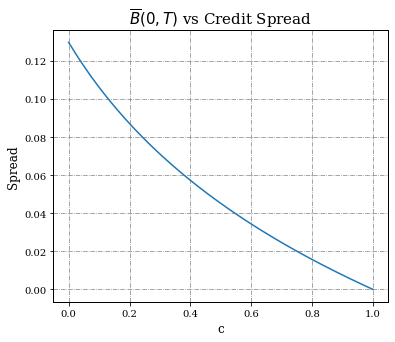

In [81]:
# ignore wanrnings
warnings.filterwarnings("ignore")

# Re-defining V and sgm_V
V, sgm_V =  fsolve(eqs, (100, 100))

# unignore warnings
warnings.filterwarnings("default")

def k(V0:float,B0:float,K:float):
    return np.log(V0/(B0*K))

def Q(T:float,sv:float,p:float,sr:float):
    return ((sv**2)*T) - (p*sv*sr*(T**2)) + ((1/3)*(sr**2)*(T**3))

def P(V0:float,B0:float,K:float,T:float,sv:float,p:float,sr:float):
    first = norm.cdf((k(V0,B0,K)+(0.5*Q(T,sv,p,sr)))/(np.sqrt(Q(T,sv,p,sr))))
    second = -np.exp(-2*k(V0,B0,K))
    third = norm.cdf((-k(V0,B0,K)+(0.5*Q(T,sv,p,sr)))/(np.sqrt(Q(T,sv,p,sr))))
    return first + (second * third)

def DefaultableBond(V0:float,B0:float,K:float,T:float,sv:float,p:float,sr:float,c:float):
    return ((1-((1-c)*(1-P(V0,B0,K,T,sv,p,sr)))))

cs = np.arange(0,1+0.001,0.001)
cs_li = []
for i in range(0,len(cs)):
    cs_li.append((-np.log(DefaultableBond(V,np.exp(-0.015*10),150,10,sgm_V,-0.4,0.015,cs[i]))/10))

df = pd.DataFrame(cs, columns = ['c'])
df['cs'] = cs_li

fig, (ax1) = plt.subplots(1,figsize=(6,5));
ax1.plot(df['c'],df['cs']);
ax1.set(xlabel ='c');
ax1.set(ylabel = 'Spread');
ax1.set_title('$\overline{B}(0,T)$ vs Credit Spread',size=15);
ax1.xaxis.get_label().set_fontsize(12);
ax1.yaxis.get_label().set_fontsize(12);
ax1.set(facecolor = 'white');
ax1.grid(color='Gray', linestyle='-.', linewidth=0.7);
ax1.patch.set_edgecolor('black'); 
ax1.patch.set_linewidth('1'); 

display(df)

<H2>Task 3:</H2>
Returning to a model where interest rates are deterministic and default only occurs at maturity when $V(T)<K$, i.e. when the firm's value at maturity is less than the face value of the outstanding debt, consider a Poisson process $N$ with intensity $\lambda$ under the risk-neutral measure. Let $(U_i)_{i\geq1}$ be a sequence of i.i.d. random variables with expectation $\nu$. Assume that the $\sigma$-fields generated by $W$, $N$ and $(U_i)_{i\geq1}$ are mutually independent under the risk-neutral measure.
Define
$$
\pi(t)=\sum_{i=1}^{N(t)}U_i
$$
and write the dynamics of $V$ as
$$
dV(t)=V(t-)((r-\lambda\nu)dt+\sigma_VdW_{\beta}(t)+\Delta\pi(t))
$$ 
Assume further that the $U_i+1$ are lognormally distributed, i.e.
$$
\ln(U_i+1)\sim\mathcal{N}(\mu,\sigma)
$$
Write a Python function which calculates the credit spread (in terms of continuously compounded yields) for this entity, taking as inputs (in this order) $V(0)$, $K$, $T$, $r$, $\sigma_V$, $\lambda$, $\mu$ and $\sigma$.  <I>(5 marks)</I>

***Valuation of the equity at maturity and deterministic interest rates under discountinous value process***
We should be able to use the following:
$$\overline{B}(t) = V - E(t) \Rightarrow \overline{B}(0) = V - E(0) \Rightarrow E(0) = V - \overline{B}(0)$$
We can use the fact that we can value the debt (given solvency) with the following equation:
$$V(t) = \mathbb{E}[V(T)\mathbb{I}_{\{V(T)\geq K\}}|\mathcal{F}_t,N(T)-N(t) = i] = V(t)\text{exp}\left (  \mu_i(T-t) + \frac{1}{2}\sigma_{i}^2(T-t)\mathcal{N}(d_{1,i})   \right )$$ 
And then pricing the equity using the below equation derived in lectures (splitting it up as in question 1 and above):
$$C(t) = B(t,T)\sum_{i=0}^{\infty}\text{exp}\left (  -\lambda(T-t)  \right )\frac{(\lambda(T-t))^i}{i!} \left( V(t)\text{exp}\left (  \mu_i(T-t) + \frac{1}{2}\sigma_{i}^2(T-t)\mathcal{N}(d_{1,i})   \right )- K \mathcal{N}(d_{2,i})\right )$$
Where: 
$$\mu_i(T-t) = \left ( r - \frac{1}{2}\sigma_{V}^2-\lambda \nu\right )(T-t) + i\mu, \qquad \sigma_{i}^2(T-t) = (T-t)\sigma_{V}^2 + i\sigma^2$$
And:
$$ d_{2,i} = \frac{\text{ln}\frac{V(t)}{K} + \mu_i (T-t)}{\sqrt{\sigma_{i}^2(T-t)}}, \qquad d_{1,i} = d_{2,i} + \sqrt{\sigma_{i}^2(T-t)}$$
Now, using the following formula for $\nu$:
$$\nu := \text{exp}\left ( \mu + \frac{1}{2}\sigma^2 -1 \right ) \quad \left [ 1\right ]$$

If $C(t)$ = $E(t)$, and $V(t)$ is what is described above,  the formula for credit spread $c$ is as follows:
$$c = \frac{\left(-\text{ln} (V(0)) - \left(B(0,T)\cdot E(t)\right)\right)\cdot T}{K} - r $$

***Defining a single function***

In [82]:
def credit_spread(V0:float,K:float,T:float,r:float,sigma_V:float,lam:float,mu:float,sigma:float):
    
    # Constant functions
    first = np.exp(-r*T)
    nu = np.exp(mu + 0.5*sigma**2) - 1
    
    # Loop for the sum, here - instead of truncating the sum to a 5 basis point change, I have
    # just used the maximum math.factorial that python can compute, here it is 171
    x = []
    for n in range(0,171):
        ps = np.exp(-lam*T)*((lam*T)**n)/(math.factorial(n))
        mu_i = (r - 0.5*sigma_V**2 - lam*nu)*T + mu*n
        sgm_i = T*sigma_V**2 + n*sigma**2
        d2 = ((np.log(V0/K)) + mu_i)/np.sqrt(sgm_i)
        d1 = d2+np.sqrt(sgm_i)
        result = ps*((V0*np.exp(mu_i + 0.5*sgm_i)*norm.cdf(d1)) - K*norm.cdf(d2))
        x.append(result)
        
    # V0 - discounted sum
    discount = V0 - (first*sum(x)) 
    
    # Divide by K  
    dv = discount/K
    
    # Difference with risk free
    return (-np.log(dv)/T) - r

***Test values:***
$$ V(0) = 50,000,000, \quad K = 40,000,000 ,\quad T =10 ,\quad r = 0.015,\quad \sigma_V = 0.3,\quad \lambda = 0.9, \quad\mu = -0.1 \quad \text{and} \quad \sigma = 0.2 $$

In [83]:
# Test values 
ans3 = (credit_spread(50000000,40000000, 10, 0.015, 0.3, 0.9, -0.1, 0.2))
# Print result
display(Markdown('The solution for the credit spread in task 3, with these test variables I have denoted above, is: $c=$ ' + str(round(ans3,5))))

The solution for the credit spread in task 3, with these test variables I have denoted above, is: $c=$ 0.03984

#### References

[1] Bielecki, T. R., & Rutkowski, M. (2010). Credit risk: Modeling, valuation and hedging. Springer.